**THE KING COUNTY HOUSE SALES PROJECT**

**USING REGRESION ANALYSI MODEL TO DETERMINE THE FACTORS THAT MOST INFLUNCE THE PRICE OF HOUSES AT KING COUNTY TO ENABLE A REAL ESTATE INVESTOR MAKE INFORMED INVESTMENT DECISION**

**BUSINESS UNDERSTANDING**

This project uses the king county house sales data sets to understand the paterns and trends of sale of houses in King county, Washington, USA. 

This project targets the **real estate investor** as the **stakeholder**. 
The real estate investor may benefits from this data to identify profitable houses in the area and use the information to make informed decisions on what houses to invest in.

**business problem:**  predicting the sale price of houses in King County using a  predictive model that can accurately forecast the sale price of houses in the area. The  model will be used to identify undervalued properties and inform investment decisions.


**DATA UNDERSTANDING**

**Data Sources**

This project uses the *`kc_house_data.csv`* data set which is avaible in the canvas content. The 
dataset is suitable for this project as it contains comprehensive information on various features of houses sold in King County. the features in the dataset includes data on the sale price, location, size, number of bedrooms and bathrooms, age of the property, and other amenities of each house sold. These features provide relevant information neccesary for determing trends and patterns in the real estate market in King County.

**Target:** in this project, house prices will be used as the predictive Target

**predictors:** The predictors in this project will include the following features;
* bedrooms
* bathrooms
* floors
* waterfront
* condition
* grade
* yr_built



**Importing Data**

In [156]:
#IMPORTING REQUIRED LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [157]:
kch= pd.read_csv('kc_house_data.csv')#imports the kc_house_data
kch


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287


Lets check the number of observations in our data set

In [158]:
kch.shape # checks the number of colums and rows 

(21597, 21)

There are 21597 observations in the data set

In [159]:
# CHECKING THE DATATYPES 
kch.dtypes #checking the data types of each column

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

From the above cell, we see that the data types of the columns we will be working with are **integers** and **float** type

In [160]:
kch.describe()#getting the statistical summary of the data set

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**DATA PREPARATION**

In this stage, we are going to prepare our data to make it fit for modelling and analysis.the data preparation process will include;
* data cleaning
* feature engineering
* feature selection
* checking for multicolinearity
* data normalization

**Data cleaning**

In [161]:
#lets check for the missing values
print(kch.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


From the above cell, we can see that there are 2376 missing valuse in the column waterfront, 63 from the column view, abd 3842 from the column yr_renovated. since we will be using the waterfront column, lets handle the missing value in the column.

since we will not be using the columns'view' and 'yr_renovated', we will ignore the missing values.

In [162]:
#lets calculate the median of the column waterfront
median_wf = kch['waterfront'].median()
print('Median of waterfront column:', median_wf)

Median of waterfront column: 0.0


In [163]:
#replacing the missing value with the median
kch['waterfront'].replace(np.nan,median_wf, inplace=True)

In [164]:
#confirming replacement of the missing values in the column 'waterfront'
print(kch.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


From the above cell,the number of missing values in waterfront is 0, thus confirming a successfull replacent

**Feature engineering**

lets add anothe column to the dataset which will be derived from subtracting the yr_built from the current year. The column will be named 'age'.

In [165]:
# Calculate the age of the house
current_year = 2023
kch['age'] = current_year - kch['yr_built']

# Print the first few rows to confirm the new column has been added
print(kch.head())

           id        date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  10/13/2014  221900         3       1.00         1180      5650   
1  6414100192   12/9/2014  538000         3       2.25         2570      7242   
2  5631500400   2/25/2015  180000         2       1.00          770     10000   
3  2487200875   12/9/2014  604000         4       3.00         1960      5000   
4  1954400510   2/18/2015  510000         3       2.00         1680      8080   

   floors  waterfront  view  ...  sqft_above  sqft_basement  yr_built  \
0     1.0         0.0   0.0  ...        1180              0      1955   
1     2.0         0.0   0.0  ...        2170            400      1951   
2     1.0         0.0   0.0  ...         770              0      1933   
3     1.0         0.0   0.0  ...        1050            910      1965   
4     1.0         0.0   0.0  ...        1680              0      1987   

  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  age 

In [166]:
kch.shape #rechecking the shape

(21597, 22)

In [167]:
kch # confirming the addition of the column 'age'

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,68
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,72
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,90
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,58
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0,2009,0.0,98103,47.6993,-122.346,1530,1509,14
21593,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0,2014,0.0,98146,47.5107,-122.362,1830,7200,9
21594,1523300141,6/23/2014,402101,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007,14
21595,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,0.0,0.0,...,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287,19


**Feature selection**

This project intends to use price,bedrooms,bathrooms, floors waterfront, condition, grade,yr_built and age columns as features. 'price will be the predictive target while the rest will be the predictors.

In the cell below we will create a new dataset to include only these feature columns.

In [168]:
#selecting the specific columns
features = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'age']
#creating the new dataset which includes the selected columns
new_kch = kch[features]
new_kch.head()

,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,age
0,221900,3,1.00,1.0,0.0,3,7,1955,68
1,538000,3,2.25,2.0,0.0,3,7,1951,72
2,180000,2,1.00,1.0,0.0,3,6,1933,90
3,604000,4,3.00,1.0,0.0,5,7,1965,58
4,510000,3,2.00,1.0,0.0,3,8,1987,36


**CHECKING FOR MULTICOLLINEARITY**

To check for multicollinearity we will use the correlation matrix. 

In [169]:
# creating a list of the predictor variables 
predictors = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'age']
#creating the correlation matrix
corr_matrix = new_kch[predictors].corr()
print(corr_matrix)

               price  bedrooms  bathrooms    floors  waterfront  condition  \
price       1.000000  0.308787   0.525906  0.256804    0.264306   0.036056   
bedrooms    0.308787  1.000000   0.514508  0.177944   -0.002127   0.026496   
bathrooms   0.525906  0.514508   1.000000  0.502582    0.063629  -0.126479   
floors      0.256804  0.177944   0.502582  1.000000    0.020797  -0.264075   
waterfront  0.264306 -0.002127   0.063629  0.020797    1.000000   0.016648   
condition   0.036056  0.026496  -0.126479 -0.264075    0.016648   1.000000   
grade       0.667951  0.356563   0.665838  0.458794    0.082818  -0.146896   
yr_built    0.053953  0.155670   0.507173  0.489193   -0.024487  -0.361592   
age        -0.053953 -0.155670  -0.507173 -0.489193    0.024487   0.361592   

               grade  yr_built       age  
price       0.667951  0.053953 -0.053953  
bedrooms    0.356563  0.155670 -0.155670  
bathrooms   0.665838  0.507173 -0.507173  
floors      0.458794  0.489193 -0.489193  
wate

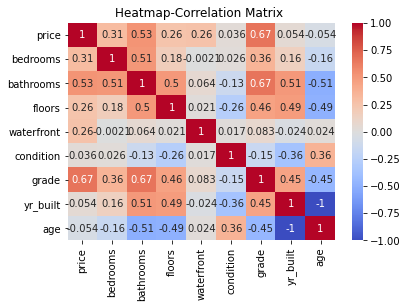

In [170]:
#visualizing the correlation matrix using a heat map
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Heatmap-Correlation Matrix ')
plt.show()

From the plot above, none of the variables has values greater than 0.7, which is the threshold for high correlation. this means that there are no multicollinearity in our data

**DATA NORMALIZATION**

Data normalization improves the performance and accuracy of models by ensuring that each variable has equal influence on the analysis/model.

In the cells below, we will normalize our data to ensure more accurate results.

In [171]:
#Importing the StandardScaler
from sklearn.preprocessing import StandardScaler
# select the defined predictors
predictors = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'age']
#normalize the data using the StandardScaler
scaler = StandardScaler()
new_kch_normalized = scaler.fit_transform(new_kch[predictors])
new_kch_normalized = pd.DataFrame(new_kch_normalized, columns=predictors)

# Check the summary statistics of the normalized data
print(new_kch_normalized.describe())

              price      bedrooms     bathrooms        floors    waterfront  \
count  2.159700e+04  2.159700e+04  2.159700e+04  2.159700e+04  2.159700e+04   
mean  -4.211209e-17 -1.750284e-16  1.368643e-16 -5.264011e-17 -3.948008e-18   
std    1.000023e+00  1.000023e+00  1.000023e+00  1.000023e+00  1.000023e+00   
min   -1.258431e+00 -2.562083e+00 -2.101296e+00 -9.155523e-01 -8.249975e-02   
25%   -5.942312e-01 -4.029030e-01 -4.757376e-01 -9.155523e-01 -8.249975e-02   
50%   -2.457988e-01 -4.029030e-01  1.744858e-01  1.093927e-02 -8.249975e-02   
75%    2.850161e-01  6.766871e-01  4.995975e-01  9.374309e-01 -8.249975e-02   
max    1.948963e+01  3.198480e+01  7.652055e+00  3.716906e+00  1.212125e+01   

          condition         grade      yr_built           age  
count  2.159700e+04  2.159700e+04  2.159700e+04  2.159700e+04  
mean   1.421283e-16  3.842728e-16  2.653061e-15  4.211209e-17  
std    1.000023e+00  1.000023e+00  1.000023e+00  1.000023e+00  
min   -3.704400e+00 -3.970359e+0

**EXPORATORY DATA ANAYSIS(EDA)**

In [172]:
#lets chech the summary statistics of the data
print(new_kch.describe())

              price      bedrooms     bathrooms        floors    waterfront  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   5.402966e+05      3.373200      2.115826      1.494096      0.006760   
std    3.673681e+05      0.926299      0.768984      0.539683      0.081944   
min    7.800000e+04      1.000000      0.500000      1.000000      0.000000   
25%    3.220000e+05      3.000000      1.750000      1.000000      0.000000   
50%    4.500000e+05      3.000000      2.250000      1.500000      0.000000   
75%    6.450000e+05      4.000000      2.500000      2.000000      0.000000   
max    7.700000e+06     33.000000      8.000000      3.500000      1.000000   

          condition         grade      yr_built           age  
count  21597.000000  21597.000000  21597.000000  21597.000000  
mean       3.409825      7.657915   1970.999676     52.000324  
std        0.650546      1.173200     29.375234     29.375234  
min        1.000000      3.00000

**Visualizing the relationship between the number of bedrooms and the price of the houses using a scatter plot:**

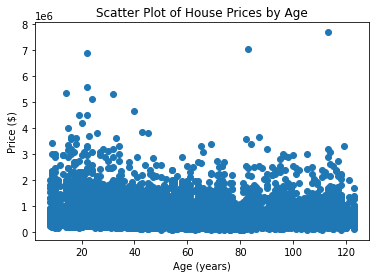

In [173]:
plt.scatter(new_kch['age'], new_kch['price'])
# Set plot title and axis labels
plt.title('Scatter Plot of House Prices by Age')
plt.xlabel('Age (years)')
plt.ylabel('Price ($)')
plt.show()


Visualizing the relationship between the number of bedrooms and the price of the houses using a scatter plot:

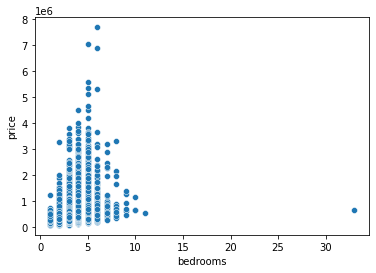

In [174]:
sns.scatterplot(data=new_kch, x='bedrooms', y='price')

plt.show()

The pointsfrom the scatter above  form a clear sloping line, indicting that there is positive  correlation between the two variables.

**Data spliting**

In [175]:
#importing relevant library
from sklearn.model_selection import train_test_split

#assigning predictors to X and outcome variable to y
X= new_kch[['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'age']]
y= new_kch['price']

#spliting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [176]:
X_train.info() #checks the informations of the train data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 753 to 15795
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       15117 non-null  int64  
 1   bedrooms    15117 non-null  int64  
 2   bathrooms   15117 non-null  float64
 3   floors      15117 non-null  float64
 4   waterfront  15117 non-null  float64
 5   condition   15117 non-null  int64  
 6   grade       15117 non-null  int64  
 7   yr_built    15117 non-null  int64  
 8   age         15117 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.2 MB


In [177]:
X_test.info() #checks the informations of the test data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 3686 to 3372
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       6480 non-null   int64  
 1   bedrooms    6480 non-null   int64  
 2   bathrooms   6480 non-null   float64
 3   floors      6480 non-null   float64
 4   waterfront  6480 non-null   float64
 5   condition   6480 non-null   int64  
 6   grade       6480 non-null   int64  
 7   yr_built    6480 non-null   int64  
 8   age         6480 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 506.2 KB


In [178]:
X_train.shape#checking the number of observations in the X_train data

(15117, 9)

In [179]:
X_test.shape # checking the number of observations in the test data


(6480, 9)

**MODELLING**

This project willl adopt a regression model. Since we have perfomed data spliting lets start by scaling the training data.

In [180]:
from sklearn.preprocessing import MinMaxScaler #importing required library
scaler = MinMaxScaler() # # using the MinMaxScaler
scaled_X_train = scaler.fit_transform(X_train) # scaling the training data

In [181]:
#Training the X_test data 
scaled_X_test = scaler.fit_transform(X_test)

**Baseline model**

lets build a linear regression model using the output variable, `price` in the cell below

In [182]:
#importing relevant libraary
from sklearn.linear_model import LinearRegression
#creating the baseline model
model = LinearRegression()

In [186]:
# Fitting a linear regression model
model.fit(X_train, y_train)

LinearRegression()

In [187]:
#make predictions on both the training and test sets using the model
train_preds = model.predict(scaled_X_train)
test_preds = model.predict(scaled_X_test)

print('train predictions:', train_preds)
print('test predictions:', test_preds)

train predictions: [0.08157964 0.21280504 0.02361585 ... 0.02909997 0.02191026 0.06127001]
test predictions: [0.00723703 0.04772141 0.05904271 ... 0.05166237 0.04914732 0.03926627]


**Evaluating the model**

MSE and R Squared

In [189]:
# importing relevant libraries
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred) #calculating the MSE
r2 = r2_score(y_test, y_pred) # calculating the r squared
print('MSE:', mse)
print('R-squared:', r2)

MSE: 1.3941878006765616e-19
R-squared: 1.0


An R-squared score closer to 1 indicates a better model fit, but a score of 1 is unrealistic.mean squared error (MSE) of 1.3 could be either good or bad. Generally, a lower MSE indicates better predictive performance

cross_validate and ShuffleSplit

In [190]:
# Import necessary modules
from sklearn.model_selection import cross_validate, ShuffleSplit

# Create a ShuffleSplit cross-validation splitter that will create 3 splits, each with 25% of the data as the test set
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
target_variable = 'price' 
# Use cross_validate to evaluate the baseline model on the most correlated feature (as determined earlier)
baseline_scores = cross_validate(
    estimator=model,  # The model to evaluate
    X=X_train[['price']],  # The feature(s) to use as input (in this case, just the most correlated feature)
    y=y_train,  # The target variable to predict
    return_train_score=True,  # Whether to return the training scores as well as the validation scores
    cv=splitter  # The cross-validation splitter to use
)

# Print the mean training score and mean validation score over the 3 splits
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      1.0
Validation score: 1.0


A train_score of 1 indicates that the model is perfectly fitting the training data, which could suggest overfitting. 
A test_score of 1 could indicate that the model is performing well on the validation data, but it is also possible that the model is overfitting to the training data and performing poorly on new data.

**Predictor Model**

since we have developed a baseline model with only price, lets build a second model which will include all columns of the predictor features as earlier identified

In [191]:
#creating a df with all predictor variables
X_train_predictors = X_train[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'age']]
X_train_predictors.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,age
753,2,2.50,1.0,0.0,3,8,2010,13
1418,4,3.75,2.0,1.0,3,10,1999,24
8178,3,2.50,2.0,0.0,3,8,1994,29
2254,4,2.00,1.0,0.0,3,7,1977,46
4063,8,3.00,1.0,0.0,3,7,1959,64


lets visualize the predictors aganist the target variable `price` using scatter plots

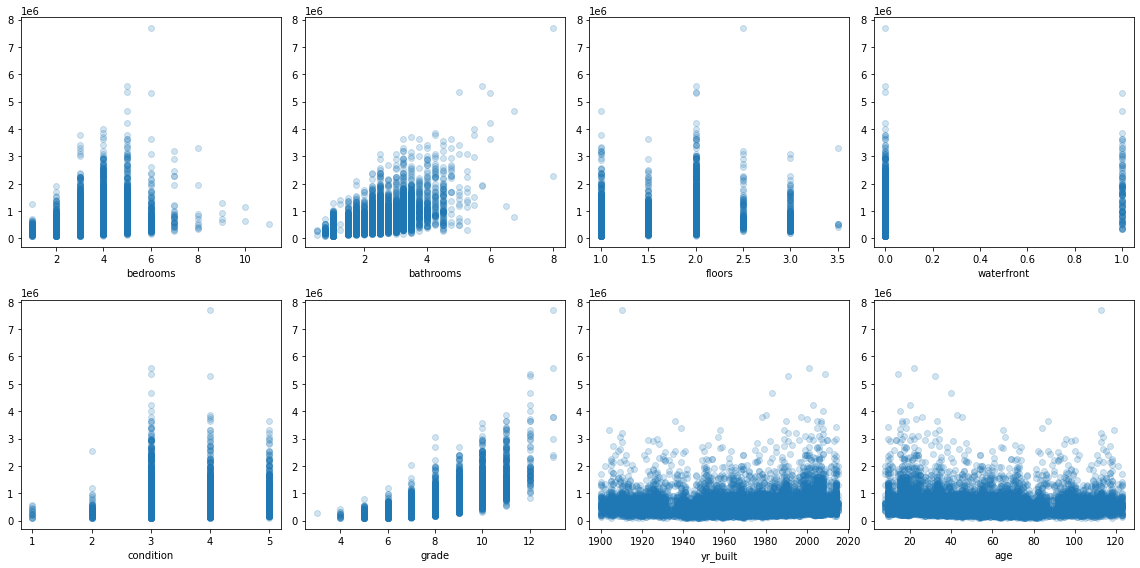

In [192]:
scatterplot_data = X_train_predictors
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//4][index%4]
    ax.scatter(X_train_predictors[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    
plt.tight_layout()
plt.show()

from the above plot, we will drop the feature `age` and `yr_built` since in the house could be in good condition despite its age thus the feature `condition`. we will also drop the feature `bathrooms` since the feature `bedrooms` can be used to predict the number of bathrooms in the house. we will also drop the feature `waaterfront` as it does not seem to have an impact with the price houses.

we will therefor use the features `bedrooms`, `floors`, `condition` and `grade`

In [193]:
# creating a df with the features variables that will be used in the model
predictor_variables = new_kch[['price','bedrooms', 'floors', 'condition', 'grade']]
predictor_variables.head()

,price,bedrooms,floors,condition,grade
0,221900,3,1.0,3,7
1,538000,3,2.0,3,7
2,180000,2,1.0,3,6
3,604000,4,1.0,5,7
4,510000,3,1.0,3,8


In [194]:
#assigning predictors to X and outcome variable to y
X= predictor_variables[['bedrooms', 'floors', 'condition', 'grade']]
y= predictor_variables['price']

#spliting data into test and train
X_train_predictor, X_test_predictor, y_train_predictor, y_test_predictor = train_test_split(X, y, test_size=0.3, random_state=42)

In [195]:
X_train_predictor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15117 entries, 753 to 15795
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   15117 non-null  int64  
 1   floors     15117 non-null  float64
 2   condition  15117 non-null  int64  
 3   grade      15117 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 590.5 KB


In [196]:
X_test_predictor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 3686 to 3372
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   6480 non-null   int64  
 1   floors     6480 non-null   float64
 2   condition  6480 non-null   int64  
 3   grade      6480 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 253.1 KB


In [197]:
pv_train = scaler.fit_transform(X_train_predictor) # scaling the training data

In [198]:
#Training the X_test data 
pv_test = scaler.fit_transform(X_test_predictor)# scaling the test data

lets build the predictor model

In [199]:
predictor_model = LinearRegression()

In [295]:
# Fitting a linear regression model
predictor_model.fit(X_train_predictor, y_train)

LinearRegression()

In [296]:
#make predictions on both the training and test sets using the model
pm_train_preds = predictor_model.predict(pv_train)
pm_test_preds = predictor_model.predict(pv_test)

pm_train_preds
pm_test_preds

array([-1333616.31075931, -1314799.01976459, -1308924.52367101, ...,
       -1309889.66945385, -1297894.16079436, -1310854.81523669])

**Evaluating the model**

In [297]:
from sklearn.model_selection import cross_validate, ShuffleSplit

# Create a ShuffleSplit cross-validation splitter that will create 3 splits, each with 25% of the data as the test set
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
target_variable = 'price' 
# Use cross_validate to evaluate the baseline model on the most correlated feature (as determined earlier)
predictor_scores = cross_validate(
    estimator=model,  # The model to evaluate
    X=predictor_variables[['bedrooms', 'floors', 'condition', 'grade']],  # The feature(s) to use as input (in this case, just the most correlated feature)
    y=predictor_variables['price'],  # The target variable to predict
    return_train_score=True,  # Whether to return the training scores as well as the validation scores
    cv=splitter  # The cross-validation splitter to use
)

# Print the mean training score and mean validation score over the 3 splits
print("Train score:     ", predictor_scores["train_score"].mean())
print("Validation score:", predictor_scores["test_score"].mean())

Train score:      0.4656814879495929
Validation score: 0.4789513322910148


The model has a train score of 0.466, which means that it explains 46.6% of the variability in the target variable (dependent variable) based on the predictor variables (independent variables) in the training data.

The validation score of 0.479 indicates that the model is able to generalize and perform reasonably well on new data that it has not been trained on.

given the results above, lest investigate the multicolinearity

In [298]:
import statsmodels.api as sm

sm.OLS(y_train_predictor, sm.add_constant(X_train_predictor)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     3464.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:59:47   Log-Likelihood:            -2.1030e+05
No. Observations:               15117   AIC:                         4.206e+05
Df Residuals:                   15112   BIC:                         4.206e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.421e+06      2e+04    -71.206      0.000   -1.46e+06   -1.38e+06
bedrooms    3.088e+04   2572.206     12.007      0.000    2.58e+04    3.59e+04
floors     -2.277e+04   4630.033     -4.918      0.000   -3.18e+04   -1.37e+04
condition   7.527e+04   3464.279     21.727      0.000    6.85e+04    8.21e+04
grade       2.135e+05   2203.465     96.911      0.000    2.09e+05    2.18e+05
==============================================================================
Omnibus:                    12895.402   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           948377.839
Skew:                           3.697   Prob(JB):                         0.00
Kurtosis:                      41.092   Cond. No.                         86.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**INTERPRATING THE MODEL**

In [312]:
#display the coefficients and intercept for the final model:
print(pd.Series(predictor_model.coef_, index=X_train_predictor.columns, name="Coefficients"))
print()
print("Intercept:", predictor_model.intercept_)

bedrooms      30884.665051
floors       -22769.040353
condition     75269.163979
grade        213539.771749
Name: Coefficients, dtype: float64

Intercept: -1420634.466925364


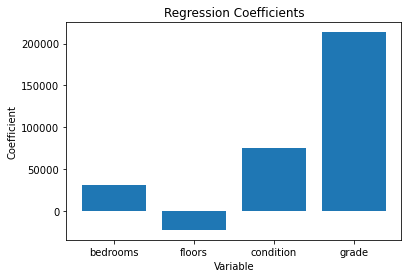

In [323]:
#Lets visualize the finding using a bar plot
import matplotlib.pyplot as plt

X = ['bedrooms', 'floors', 'condition', 'grade']
coef = [30884.665051, -22769.040353, 75269.163979, 213539.771749]

plt.bar(X, coef)

plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.title('Regression Coefficients')
plt.show()

The coefficient for the `bedrooms` , `condition`, and `grade` variables are 30,884.67, 75,269.16 and 213,539.77 respectively. This means that, on average, an addition of the features in a house is associated with an increase in its price by $30,884.67,$75,269.16, and $213,539.77 respectively, holding all other predictors constant.

On the other hand,`floors` has a coefficient of -22769.04. this means that for every increase in the number of floors, the price of the house is expected to decrease by approximately $22,769.04, holding all other predictors constant.

The intercept value of -1420634.45 represents the predicted price of a house when all predictor variables are zero. However, in practice, it is unlikely that a house would have zero bedrooms, condition score,floors or grade score.

determining the coefficients of other predictor variables usong the model

In [315]:
#creating aa df of the remaining four predictors
X= new_kch[['bathrooms','age', 'yr_built','waterfront']]
#checking the coefficients and arranging them 
coef = pd.Series(predictor_model.coef_, index=X.columns).abs().sort_values(ascending=False)
coef


waterfront    213539.771749
yr_built       75269.163979
bathrooms      30884.665051
age            22769.040353
dtype: float64

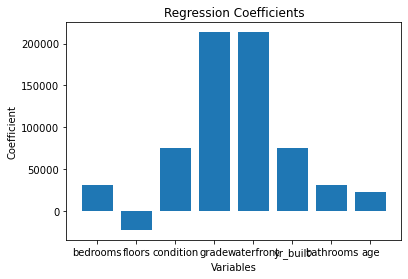

In [324]:
# lets visualize all predictors coefficients 
import matplotlib.pyplot as plt

X = ['bedrooms', 'floors', 'condition', 'grade', 'waterfront', 'yr_built','bathrooms','age']
coef = [30884.665051, -22769.040353, 75269.163979, 213539.771749, 213539.771749, 75269.163979, 30884.665051, 22769.040353 ]

plt.bar(X, coef)

plt.ylabel('Coefficient')
plt.xlabel('Variables')
plt.title('Regression Coefficients')
plt.show()

from the coefficients above, the features with the highest coeffients are `grade` and `waterfront`

**CONCLUSION**

This analysis aimed at determing the patterns and trends of hosunig prices in King County. from these analysis the following conclusions are drawn

* Based on the coeeficients, the most important variables in predicting the price of houses are the grade and the waterfront of the property. 
* Condition, number of bedrooms and bathrooms also have a significant positive impact on the price.
* The Number of floors in a house seems to have a negative impact on the price of the house. the more the number of floors the less the price of the house

**BUSINESS RECOMMENDATIONS**
From the conclusions drawn above, the following reccomendation are made the stakeholder, a real estate investor;


* The real estate investor should focus on properties with higher grades and those located on waterfronts as they have the highest coefficients and therefore, will likely have a higher resale value.
* Properties with a good condition, higher number of bedrooms and bathrooms are also likely to have a positive impact on the price. 
* The number of floors in a house seems to have a negative impact on the price of the house, so the investor should be cautious when considering multi-story properties.
* The investor consider the interaction between variables when making investment decisions. For example, a waterfront property with a high grade and good condition may have a higher resale value than a waterfront property with a low grade and poor condition.